Linear Regression with Gradient Descent

In [2]:
# download_data.py

from pandas import read_table

def download_data(fileLocation, fields):
    '''
    Downloads the data for this script into a pandas DataFrame. Uses columns indices provided
    '''

    frame = read_table(
        fileLocation,
        
        # Specify the file encoding
        # Latin-1 is common for data from US sources
        encoding='latin-1',
        #encoding='utf-8',  # UTF-8 is also common

        # Specify the separator in the data
        sep=',',            # comma separated values

        # Ignore spaces after the separator
        skipinitialspace=True,

        # Generate row labels from each row number
        index_col=None,

        # Generate column headers row from each column number
        header=0,          # use the first line as headers

        usecols=fields
    )

    # Return the entire frame
    return frame

In [3]:
# dataNormalization.py

import numpy as np

def rescaleNormalization(dataArray):
    min = min(dataArray)
    denom = max(dataArray) - min
    newValues = []
    for x in dataArray:
        newX = (x - min) / denom
        newValues.append(newX)
    return newValues

def rescaleMatrix(dataMatrix):
    colCount = len(dataMatrix[0])
    rowCount = len(dataMatrix)
    newMatrix = np.zeros(dataMatrix.shape) 
    for i in range(0, colCount):
        min = dataMatrix[:,i].min()
        denom = dataMatrix[:,i].max() - min
        for k in range(0, rowCount):
            newX = (dataMatrix[k,i] - min) / denom
            newMatrix[k,i] = newX
    return newMatrix


def meanNormalization(dataArray):
    mean = np.mean(dataArray)
    denom = max(dataArray) - min(dataArray)
    newValues = []
    for x in dataArray:
        newX = (x - mean) / denom
        newValues.append(newX)
    return newValues


In [4]:
# GD.py

import numpy as np
# X          - single array/vector
# y          - single array/vector
# theta      - single array/vector
# alpha      - scalar
# iterations - scalar

def costFunction(X, Y, theta):
    m = len(Y)
    cost = np.sum((X.dot(theta) - Y) ** 2)/(2 * m)
    return cost

def gradientDescent(X, Y, theta, alpha, numIterations):
    '''
    # This function returns a tuple (theta, Cost array)
    '''
    m = len(Y)
    arrCost =[];
    transposedX = np.transpose(X) # transpose X into a vector  -> XColCount X m matrix
    for interation in range(0, numIterations):
        B = X.dot(theta)
        residualError =  B - Y
        gradient =  X.T.dot(residualError) / m
        change = [alpha * x for x in gradient]
        theta = np.subtract(theta, change)  # theta = theta - alpha * gradient

        # calculate the current cost with the new theta; 
        atmp = costFunction(X, Y, theta)
        print(atmp)
        arrCost.append(atmp)
        # cost = (1 / m) * np.sum(residualError ** 2)

    return theta, arrCost

2.83222091675
1.2625831379
0.712610828731
0.504095294603
0.411360982257
0.359185958203
0.322380926333
0.292405045589
0.266266698171
0.242832494383
0.221599088554
0.202283805083
0.184687555667
0.168648361694
0.154025076748
0.140691221801
0.12853224901
0.117444006219
0.107331656135
0.0981087972582
0.0896966979989
0.082023610443
0.0750241488914
0.0686387248305
0.0628130324626
0.0574975800252
0.0526472627389
0.0482209736605
0.0441812490665
0.0404939453003
0.03712794429
0.0340548851925
0.0312489198462
0.0286864899192
0.026346123829
0.0242082516777
0.0222550366062
0.0204702211101
0.0188389869886
0.0173478277186
0.0159844321503
0.0147375785207
0.0135970378686
0.0125534860183
0.0115984233701
0.0107241018064
0.00992345808175
0.00919005312055
0.00851801669993
0.00790199703877
0.00733711485814
0.00681892151629
0.00634336085679
0.00590673444037
0.00550566986017
0.00513709186705
0.00479819605543
0.00448642488274
0.00419944581524
0.00393513141172
0.00369154117313
0.00346690500141
0.00325960812489
0.

3.98207227572e-08
3.8817636016e-08
3.78398170987e-08
3.68866295071e-08
3.59574527764e-08
3.50516820714e-08
3.41687277927e-08
3.33080151929e-08
3.24689840025e-08
3.16510880655e-08
3.08537949833e-08
3.00765857686e-08
2.93189545074e-08
2.85804080297e-08
2.78604655885e-08
2.71586585469e-08
2.64745300728e-08
2.5807634842e-08
2.51575387478e-08
2.45238186189e-08
2.39060619436e-08
2.33038666014e-08
2.27168406012e-08
2.21446018262e-08


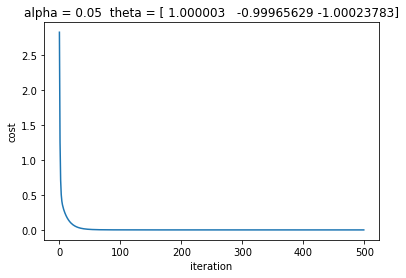

results: 0.00019616202971630068 (0.00031548596901020243)


In [16]:
# main.py

import matplotlib.pyplot as plt
import numpy as np
#from GD import gradientDescent
#from dataNormalization import rescaleMatrix

# parameters

# test multiple learning rates and report their convergence curves. 
ALPHA = 0.05
MAX_ITER = 500

#% step-1: load data and divide it into two subsets, used for training and testing
sat = download_data('sat.csv', [1, 2, 4]).values # three columns: MATH SAT, VERB SAT, UNI. GPA  # convert frame to matrix

# Normalize data
# Min/Max Normalization Method: element minus smallest element, divided by the difference between min and max element
satMin, satMax = sat.max(), sat.min()
sat = (sat - satMin)/(satMax - satMin)

# Mean Normalization Method: element minus mean of elements, divided by standard deviation
sat = (sat - np.mean(sat, axis=0)) / np.std(sat, axis=0)

# Broadcasting Normalization: to reshape matrix based on row sums
row_sums = sat.sum(axis=1)
sat = sat / row_sums[:, np.newaxis]

#sat = rescaleMatrix(sat)

 
# training data;
satTrain = sat[0:60, :]
# testing data; 
satTest = sat[60:len(sat),:]

#% step-2: train a linear regression model using the Gradient Descent (GD) method
# ** theta and xValues have 3 columns since have 2 features: y = (theta * x^0) + (theta * x^1) + (theta * x^2)
theta = np.zeros(3) 

xValues = np.ones((60, 3)) 
xValues[:, 1:3] = satTrain[:, 0:2]
yValues = satTrain[:, 2]
# call the GD algorithm, placeholders in the function gradientDescent()
[theta, arrCost] = gradientDescent(xValues, yValues, theta, ALPHA, MAX_ITER)

 
#visualize the convergence curve
plt.plot(range(0,len(arrCost)),arrCost);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}  theta = {}'.format(ALPHA, theta))
plt.show()

#% step-3: testing
testXValues = np.ones((len(satTest), 3)) 
testXValues[:, 1:3] = satTest[:, 0:2]
tVal =  testXValues.dot(theta)
 

#% step-4: evaluation
# calculate average error and standard deviation
tError = np.sqrt([x**2 for x in np.subtract(tVal, satTest[:, 2])])
print('results: {} ({})'.format(np.mean(tError), np.std(tError)))